# Global Shark Attacks -Final Code Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing Packages that we are going to use for data cleaning
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import folium
import random
#from folium import plugins
#import geopandas as gpd
#import geoviews as gv
#from geopandas import GeoDataFrame
#import shapefile
!pip install nltk
# import difflib
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is alre

True

In [ ]:
# Allowing us to see the max amount of columns and rows, this helps with analyses
pd.set_option('display.max_columns',None,'display.max_rows',None)

In [ ]:
sharks = pd.read_excel("/content/drive/My Drive/GSAF5.xls")

In [ ]:
# Looking at the first observation from our dataset
sharks.iloc[1]

Date                                                   13 Oct-2023
Year                                                        2023.0
Type                                                  Questionable
Country                                                        USA
State                                                   California
Location          Linda Mar, Pacific State Beach, San Mateo County
Activity                                                   Surfing
Name                                                          male
Sex                                                              M
Age                                                             52
Injury                            Minor linjury to left lower leg 
Unnamed: 11                                                    NaN
Time                                                         15h45
Species                                                        NaN
Source                                        CBS News. 10/13/

In [ ]:
# Selecting the columns that we want to keep and renaming a few columns
sharks = sharks[['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name',
                  'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ']]
sharks.rename(columns={'Unnamed: 11': 'Fatality'}, inplace=True)
sharks.rename(columns={'Species ': 'Species'}, inplace=True)

In [ ]:
# Using the info method to look at what we are working with
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931 entries, 0 to 6930
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6906 non-null   object 
 1   Year      6904 non-null   float64
 2   Type      6888 non-null   object 
 3   Country   6856 non-null   object 
 4   State     6425 non-null   object 
 5   Location  6342 non-null   object 
 6   Activity  6322 non-null   object 
 7   Name      6687 non-null   object 
 8   Sex       6327 non-null   object 
 9   Age       3920 non-null   object 
 10  Injury    6871 non-null   object 
 11  Fatality  6344 non-null   object 
 12  Time      3388 non-null   object 
 13  Species   3786 non-null   object 
dtypes: float64(1), object(13)
memory usage: 758.2+ KB


In [ ]:
# Removes anything over row 6905 --> Those rows contained missing data
sharks = sharks.iloc[:6905]
# Looking at the first observation in dataframe form
sharks.head(1)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species
0,15 Oct-2023,2023.0,Unprovoked,USA,Hawaii,"Hanalei Bay, Kauai",Surfing,Kevin Kanehe,M,50,Left leg and hand injured,N,16h00,"Tiger shark, 12' to 15'"


# Cleaning the "Species" Column - Matt

In [ ]:
# Getting all the unknowns to be one name
sharks['Species'].fillna('unidentified', inplace=True)

#Making all the weird unknown ones
sharks['Species'] = sharks['Species'].replace(['Unkown', 'questionable', 'NaN', 'Unidentified species','Shark involvement suspected but not confirmed','Shark involvement prior to death suspected but not confirmed','Shark involvement unconfirmed but considered probable','Shark was said to “have a very rough ½”-thick skin','"Shark caught later"','Remains recovered from shark caught days later','Fishermen recovered partial remains from shark a week later','Remains recovered 5 days later','Comrades saw shark\'s tail appear about 5\' away','Shark involvement prior to deaths was not confirmed','Unknown','Shark seen feeding on turtle scraps thrown overboard prior to incident.','Two shark\'s teeth recovered from canoe','"small brown-colored shark"','Tooth fragments recovered from hull','Salmon shark suspected, but unlikely','a small reef shark','Shark involvement prior to death still to be determined','shark pup',' ','Some drowned but other may have been killed by blue sharks','"a young shark"','"juvenile shark"','Shark involvement prior to death could not be determined','Unidentified shark','Unknown, but it was reported that a shark tooth was recovered from the wound','Reported by media as shark attack, but shark involvement prior to death was not confirmed','Shark involvement prior to death unconfired','Species unidentified','Said to involve a grey nurse shark that leapt out of the water and seized the boy but species identification is questionable',' ','Shark involvement prior to death not confirmed','','Questionable Incident','','Unidentified','Unidentified ',''], 'unidentified')

# size based no name
sharks['Species'] = sharks['Species'].replace(["Said to involve a 6 m to 7.3 m [20' to 24'] shark","Said to be a 7.6 m [25'] shark", "According to Carlsmith, the shark's mouth was 3' wide","a small shark",'"a very large shark"','Said to be a “small shark”','Questionable, 2m shark suspected','Allegedly a 33-foot shark','18-foot shark','5.5\' to 6\' shark','A 20\' shark known as "Old Tom"','Said to involve a 2.7 m [9\'] shark','3.7 m to 4.3 m [12\' to 14\']  shark','15\'','0.7 m [2.5\'] shark','> 3 m shark','2.4 m  [8\'] shark','2.7 m [9\']  shark','3 m to 4.3 m [10\' to 14\'] shark','4.9 m [16\'] shark','3.5 m [11\'6"] shark captured','1.2 m [4\'], possibly  larger shark','4.9 m [16\']shark','2.7 m to 3 m [9\' to 10\'] sharks','"A long thin brown-colored shark"','<1.5 m shark','60 cm  shark','Said to involve a 4.9 m [16\'] "red shark"','43" shark','1.5 m to 1.8 m  [5\' to 6\'] shark','Next morning a 3 m [10\'] shark was caught that had Andrews\' leg in its gut','36"  shark','5m shark','"a little shark"','4 m [13\'] shark x 6','Said to involve a >4 m [13\'] shark','3.7 [12\'] shark','a "small slim brown shark"','>6.7 m [22\']  shark','2 m [6\'9"] shark','3 m [10\'] shark seen in vicinity','3.7 m [12\'] shark & may have been another shark nearby','1.8 to 2.1 m [6\' to 7\'] shark','1.4 m [4.5\'] shark','1.5 m to 1.8 m [5\' to 6\'] sharks','3.7 m [12\'] shark','>3 m [10\'] shark','<1 m shark','14\' to 18\'shark','4.5 m shark','3.5 to 4 m shark','3- to 4-foot shark','1m to 1.2 m shark','1.8 metre shark','4\' tp 5\' shark','80 kg shark','2.6 m shark','2\' to 3\' reef shark','2\'  shark','2\' to 3\' juvenile shark','+3\' shark','1\' to 2\' shark','4m shark','8" shark','6.5\' shark','1+ m shark','1.3m shark','5m to 6m shark','5.5 ft shark','8 ft shark','4\' shark?','3+ m shark','4.5 to 5\' shark','4.5\' to 5\' shark','A "small shark"','1.7 m shark','1.2 m to 1.8 m [4\' to 6\'] shark','60 cm to 90 cm [2\' to 3\'] shark','A 2\' shark was seen in the area by witnesses','2.1 to 2.4 m [7\' to 8\'] shark','1.8 m to 2.4 m [6\' to 8\'] "black finned shark"','1.2 m to 1.5 m [4.5\' to 5\'] shark','>2 m shark','Two sharks seen in vicinity: 2.4 m & 4.25 m  [8\' & 14\'] TL','"Shark had a very large girth"','7\' female shark','Small shark','1.5 to 1.8 m [5\' to 6\'] shark','1.2 m to 1.5 m [4\' to 5\']   shark','1.3 m [4\'3"] shark','1.8 m to 2.4 m [6\' to 8\'] shark, tooth fragments recovered','12\' to 18\' shark','5\' to 7\' shark','1\' to 4\' shark','Said to involve a 1.5 m shark','12\' to 14\' white shark','18" to 36" shark','[4\' to 5\']','3.5 m [11.5\']shark','3\' to 3.5\' shark','1.5 to 2 m shark','2.27 m shark','2.5\' shark','1.5\' to 2\' shark','9.5\' shark?','2 to 3 m shark','24" to 30" shark','2.4 m shark','0.9 m  [3\'] shark','0.9 m  to 1.2 m [3\' to 4\'] shark','3 m to 3.7 m [10\' to 12\'] shark','60 cm [2\'] captive shark','2.4 m to 3 m [8\' to 10\'] grey colored shark','0.9 m to 1.2 m [3\' to 4\'] shark; Tooth fragment recovered from hand','1 m  shark','2\' to 3.5\' shark','2.1 m to 2.4 m [7\' to 8\'] shark','2.4 m to 3.7 m [8\' to 12\'] shark','15 cm to 20 cm [6" to 8"] bite diameter just below left knee','1.8 m [6\'] reef shark - or a 2.1 m to 2.4 m [7\' to 8\'] grey-colored shark','3.7 m to 4.3 m [12\' to 14\'] shark','“small brown shark”','106 cm [3.5\']  shark','1.2 m [4\'] "grey-colored shark"','6\' shark','4\' shark','1.8 m [6\'] shark','1.5 m [5\'] shark','1.2 m [4\'] shark','4\' to 5\' shark','3\' shark','2 m shark','3 m [10\'] shark','3\' to 4\' shark','2.4 m [8\'] shark','7\' shark','1.2 m to 1.5 m [4\' to 5\'] shark','1.5 m shark','"a small shark"','10\' shark','8\' shark','2\' to 3\' shark','1 m shark','a small shark','2.1 m [7\'] shark','9\' shark','2.5 m shark','"small shark"','5\' to 6\' shark','1.8 m shark','6\' to 8\' shark','14\' shark','0.9 m [3\'] shark','13\' shark','4.6 m [15\'] shark','15\' shark','small shark','5\' shark','12\' shark','2\' shark','4 m [13\'] shark','4\' to 6\' shark','2m shark','10\' to 12\' shark','1m shark','4 m shark','A small shark','5.5 m [18\'] shark','18\' shark','3.5 m shark','2 m to 3 m shark','5 m shark','6\' to 7\' shark','2 sharks, 4.5 m & 3 m','5 m [16.5\'] shark','1.8 m grey shark',''], 'unidentified')

# weight based no name
sharks['Species'] = sharks['Species'].replace(['234-lb shark','80-lb hooked shark','2.4 m [8\'], 600-lb shark','1,100-lb shark','2 m [6\'9"], 87.5-kg [193-lb]  shark','193-lb shark','8-lb shark','136-kg [300-lb] shark','20 kg shark','200 to 300 kg shark','3 m [10\'], 270- kg [595-lb] shark','170-kg, 2.8 m shark','150-lb shark','6 m, 600-kg shark','3 m, 600-kg shark','On 8/13/2005 anglers from New Zealand caught a 2.8 m [9\'3"], 140-kg [309-lb] shark at the same spot. It was believed this was the same shark that killed Alysha','2 m [6.75\'] shark, 200-kg shark T' ], 'unidentified')

# group of sharks no name
sharks['Species'] = sharks['Species'].replace(['"A pack of 6 sharks"','"A pack of sharks"','Said to involve 2 sharks','a school of sharks','Remains recovered from 3 sharks','Two 2.1 m [7\'] sharks','"Attacked by a number of sharks"','Said to involve 2 sharks: 5.2 m & 6 m [17\' & 20\']','Bitten by several 1.8 m [6\'] sharks','Several sharks involved','Two 1.2 m to 1.5 m [4\' to 5\'] sharks','2 sharks, 4.5 m & 3 m','3 sharks','"small sharks"','a small shark',''], 'unidentified')

In [ ]:
# Getting all the nonconfirmed to be one name
sharks['Species'] = sharks['Species'].replace(['Shark involvement prior to death unconfirmed', 'Shark involvement not confirmed', 'Shark involvement prior to death was not confirmed','Shark involvement questionable','Shark involvement not cofirmed','Shark involvement unconfirmed','Shark involvement prior to death remains unconfirmed','Not authenticated','Shark involvement prior to deaths unconfirmed',"shark involvement not confirmed","Shark involvement not confirmed & highly unlikely",'Shark involvement probable, but not confirmed','Thought to involve a 3\' to 4\' shark, but shark involvement not confirmed','Shark involvement not confirmes','Said to involve an 8\' shark but more likely damage caused by debris','Shark involvement  not confirmed','Shark involvement  questionable','Shark involvement not confirmed; thought to be a barracuda bite','Questionable incident - shark bite may have precipitated drowning'], 'Non confirmed')

In [ ]:
#Getting all the false reports to be one name
sharks['Species'] = sharks['Species'].replace(['Questionable incident', 'Invalid', 'No shark involvement','No shark invovlement','Shark involvement not confirmed; officials considered barracua','Dooley believed his Injury was caused by stingray (Dasyatidae family)','no injury proof and no species identified','Considered a "Doubtful" incident','Reported as a shark attack, the story was a hoax','Questionable incident; reported as shark attack but thought to involve a pinniped instead'], 'false report')
sharks['Species'] = sharks['Species'].replace(['"The fish was harpooned, dried, and presented to the sailor, who went round Europe exhibiting it  It was said to be 20 feet long.','According to Benjamin, the injury was inflicted by a barracuda, not a shark','Shovelnose "shark" which is a ray, not a shark)','Authorities report injury caused bya barracuda','No shark invovlement - it ws a publicity stunt','Shark involvement highly doubtful','Injury most likely caused by barracuda, not a shark','Reported as shark attacks but injuries caused by toadfish','Reported as shark bite but injury caused by stingray','Injury believed caused by an eel, not a shark','Shark involvement not confirmed, injury may have been caused by a bluefish','Thought to involve a mako shark, but possibly a sea lion','Mr. Burgess of ISAF announced the injury was the bite of a 1.8 m [6\', 2- to 3-year old white shark. Subsequent investigation revealed there was  no shark involvement in this incident','Not a shark attack; it was a hoax','Shark involvement not confirmed, injury may be due to a stingray','Mr. Burgess of ISAF announced the injury was the bite of a 1.8 m [6\'], 2- to 3-year old white shark. Subsequent investigation revealed there was  no shark involvement in this incident'], 'false report')

In [ ]:
def clean_species(species):
    species = re.sub(r'[\'\"\[\],&.<>()\d\?:]', '', species, flags=re.IGNORECASE)  # Remove quotation marks and ampersand as well
    species = re.sub(r'\b\w{1,2}\b', '', species, flags=re.IGNORECASE)  # Remove words with 1 or 2 characters
    species = re.sub(r'\bto\b', '', species, flags=re.IGNORECASE)
    species = re.sub(r'[-]|these', '', species, flags=re.IGNORECASE)
    species = re.sub(r'(?<!\w)m(?!\w)', '', species, flags=re.IGNORECASE)
    species = re.sub(r'\s+', ' ', species, flags=re.IGNORECASE)
    species = re.sub(r'\b(kg|lb)\b', '', species, flags=re.IGNORECASE)
    species = re.sub(r'/', '', species, flags=re.IGNORECASE)
    species = re.sub(r'\bsmall\b|\blarge\b', '', species, flags=re.IGNORECASE)
    species = re.sub(r'\bcm\b', '', species, flags=re.IGNORECASE)  # Removes 'cm'
    species = re.sub(r'\bpossibly\b', '', species, flags=re.IGNORECASE)  # Removes 'possibly'
    species = re.sub(r'\bbelieved\b', '', species, flags=re.IGNORECASE)  # Removes 'believed'
    species = re.sub(r'\bthough\b', '', species, flags=re.IGNORECASE)  # Removes 'though'
    species = re.sub(r'\binvolve\b', '', species, flags=re.IGNORECASE)  # Removes 'involve'
    species = re.sub(r'\bsaid\b', '', species, flags=re.IGNORECASE)  # Removes 'said'
    species = re.sub(r'\bthoughtinvolve\b', '', species, flags=re.IGNORECASE)  # Removes 'thoughtinvolve'
    species = re.sub(r'\bMiami\b', '', species, flags=re.IGNORECASE)  # Removes 'Miami'
    species = re.sub(r'\btooth\b', '', species, flags=re.IGNORECASE)  # Removes 'tooth'
    species = re.sub(r'\bfragment\b', '', species, flags=re.IGNORECASE)  # Removes 'fragment'
    species = re.sub(r'\bfemale\b', '', species, flags=re.IGNORECASE)  # Removes 'female'
    species = re.sub(r'\bjuvenile\b', '', species, flags=re.IGNORECASE)  # Removes 'juvenile'
    species = re.sub(r'\bfrom\b', '', species, flags=re.IGNORECASE)  # Removes 'from'
    species = re.sub(r'\bpossiby\b', '', species, flags=re.IGNORECASE)  # Removes 'possiby'
    species = re.sub(r'\bpossibly\b', '', species, flags=re.IGNORECASE)  # Removes 'possibly'
    species = re.sub(r'\bpossibily\b', '', species, flags=re.IGNORECASE)  # Removes 'possibily'
    species = re.sub(r'\breported\b', '', species, flags=re.IGNORECASE)  # Removes 'reported'
    species = re.sub(r'\bmost likely\b', '', species, flags=re.IGNORECASE)  # Removes 'most likely'
    species = re.sub(r'\ballegedly\b', '', species, flags=re.IGNORECASE)  # Removes 'allegedly'

    # Add 'shark' to the end of the text if it doesn't contain 'shark' and doesn't match certain conditions
    if 'shark' not in species.lower() and species.lower() not in ['unidentified', 'non confirmed', 'false report']:
        species = species + ' shark'

    return species.strip()

sharks['Species'] = sharks['Species'].apply(clean_species)

In [ ]:
def clean_species(species):
    # Remove any spaces or words after the word 'shark'
    species = re.sub(r'(shark)\s+\b.*', r'\1', species, flags=re.IGNORECASE)
    return species.strip()

sharks['Species'] = sharks['Species'].apply(clean_species)

In [ ]:
# group of sharks no name
sharks['Species'] = sharks['Species'].replace(['Questionable incident; shark', 'Unknown but the shark','gaffed shark','Species unknown possible white shark','school sharks','Identified carcharinid shark','sharks teeth found embedded the woodwork the boat','“” shark','Shark','shark','sharks'], 'unidentified')

In [ ]:
sharks['Species'] = sharks['Species'].replace(['Doubtful Unconfirmed attack Unable verify local records shark','Questionable shark'], 'Non confirmed')

In [ ]:
import re

# Define the cleaning function
def clean_species(species):
    # If the text contains 'shark', keep only the two words before it
    if 'shark' in species.lower():
        match = re.search(r'(\b\w+\s+\w+)\s+shark', species, flags=re.IGNORECASE)
        if match:
            species = match.group(1)
    return species.strip()

# Apply the cleaning function to the 'Species' column
sharks['Species'] = sharks['Species'].apply(clean_species)

In [ ]:
import re
import difflib

# Mapping of keywords and their corresponding replacements
keywords_mapping = {
   # 'tiger': 'Tiger shark',
   # 'white': 'White shark',
    'nurse': 'Nurse shark',
    'bull': 'Bull shark',
    'bronze': 'Bronze whaler shark',
    'wobbegong': 'Wobbegong shark',
   # 'blacktip': 'Blacktip shark',
    'mako': 'Mako shark',
    'raggedtooth': 'Raggedtooth shark',
    'lemon': 'Lemon shark',
    'blue': 'Blue shark',
    'zambesi': 'Bull shark',
    'hammerhead': 'Hammerhead shark',
    #'whitetip': 'Whitetip shark',
   # 'sandtiger': 'Sandtiger shark'
}

# Define the cleaning function
def clean_species(species):
    species_lower = species.lower()

    # Checking for the presence of each keyword and applying replacements
    for keyword, replacement in keywords_mapping.items():
        if keyword in species_lower:
            species = replacement
        else:
            # Allowing for potential misspellings or similar words using difflib
            matches = difflib.get_close_matches(keyword, species_lower.split())
            if matches:
                for match in matches:
                    if match in species_lower:
                        species = replacement
                        break

    return species.strip()

# Apply the cleaning function to the 'Species' column
sharks['Species'] = sharks['Species'].apply(clean_species)

In [ ]:
sharks['Species'] = sharks['Species'].replace(['Questionable incident; shark', 'Unknown but the shark','gaffed shark','Species unknown possible white shark','school sharks','Identified carcharinid shark','sharks teeth found embedded the woodwork the boat','“” shark','Shark','shark','sharks','recovered  kayak','catsharks','than length','Invalid incident','not caused','“speareye” shark','Questionable incident','foot shark','gangeticus Fayrer','sketch observer','Less than','cold for','suit found','sharks involved','cocktail shark','pack sharks','Survivors  species','Sharks averaged length','greycolored shark','local records','adult male','grey shark','Description shark','* dog shark','sand shark','reef shark','Reef shark','Sand shark','sandshark','banjo shark','Questionable incident;  shark','ground shark','Cow shark','days later','cow shark','Thought   sand','gray shark','sharks attacked survivors the water'], 'unidentified')

In [ ]:
sharks['Species'] = sharks['Species'].replace(['white shark','White sharks','White xhark','Thought  white','shot white','recovered  white','unknown  white','While shark','Alleged  White','Alleged  white','Wfite shark','those  white','White Shark','white sharks'], 'White shark')
sharks['Species'] = sharks['Species'].replace(['tiger shark','Tiger sharks','ashore tiger','Thought  tiger','Thought  Tiger','Tiger sharks area','probably tiger','found tiger'], 'Tiger shark')
sharks['Species'] = sharks['Species'].replace(['leucas shark'], 'Bull shark')
sharks['Species'] = sharks['Species'].replace([], 'Nurse shark')
sharks['Species'] = sharks['Species'].replace(['whaler shark','Whaler shark','copper shark','Copper shark','fragments “whaler” shark','whaler tiger'], 'Bronze whaler shark')
sharks['Species'] = sharks['Species'].replace([], 'Blue shark')
sharks['Species'] = sharks['Species'].replace(['Bonita sharkk'], 'Mako shark')
sharks['Species'] = sharks['Species'].replace(['carpet shark','Carpet shark'], 'Wobbegong shark')
sharks['Species'] = sharks['Species'].replace(['Blacktip shark','blacktip shark','maculpinnis limbatus','blackfin shark','Atlantic blacktip','Thought  blacktip','blacktipped shark'], 'Oceanic blacktip shark')
sharks['Species'] = sharks['Species'].replace([], 'Hammerhead shark')
sharks['Species'] = sharks['Species'].replace([], 'Lemon shark')
sharks['Species'] = sharks['Species'].replace([], 'Raggedtooth shark')
sharks['Species'] = sharks['Species'].replace(['Oceanic whitetip','Oceaniic whitetip','whitetip shark','oceanic whitetip'], 'Oceanic whitetip shark')
sharks['Species'] = sharks['Species'].replace(['sandtiger shark','Thought  sandtiger','Sand tiger'], 'Sandtiger shark')
sharks['Species'] = sharks['Species'].replace(['Grey reef','grey reef','Gray reef'], 'Grey reef shark')
sharks['Species'] = sharks['Species'].replace(['Caribbean reef','Caribbean rreef','Caribbean Reef'], 'Caribbean reef shark')
sharks['Species'] = sharks['Species'].replace(['blacktip spinner','Blacktip spinner','spinner shark','Blacktip Spinner','Spinner blacktip','spinner blacktip'], 'Spinner shark')
sharks['Species'] = sharks['Species'].replace(['Sevengill shark','gill shark','seven gill','sevengill shark','sixgill sevengill'], 'Broadnose sevengill shark')
sharks['Species'] = sharks['Species'].replace(['Blacktip reef','blacktip reef','Blacktip Reef','Blacktail reef','black tipped'], 'Blacktip reef shark')
sharks['Species'] = sharks['Species'].replace([], 'Angel shark')
sharks['Species'] = sharks['Species'].replace([], 'Basking shark')
sharks['Species'] = sharks['Species'].replace(['gut Galapagos'], 'Galapagos shark')
sharks['Species'] = sharks['Species'].replace(['dusky shark','obscurus Steel','recovered  dusky','dusky blacktip','dusky shark'], 'Dusky shark')
sharks['Species'] = sharks['Species'].replace(['porbeagle shark','Porbeagle white','Porbeagle white'], 'Porbeagle shark')
sharks['Species'] = sharks['Species'].replace(['Cookiecutter sharks','Thought  cookiecutter'], 'Cookiecutter shark')
sharks['Species'] = sharks['Species'].replace(['dog shark','dogfish shark','Dog shark'], 'Spiny dogfish')
sharks['Species'] = sharks['Species'].replace(['Whitetip reef','Whtietip reef','whitetipped reef'], 'Whitetip reef shark')
sharks['Species'] = sharks['Species'].replace(['sandbar shark','blacktip sandbar','sandbar dusky'], 'Sandbar shark')
sharks['Species'] = sharks['Species'].replace([], 'Goblin shark')
sharks['Species'] = sharks['Species'].replace(['albimarginatus shark','silvertip shark'], 'Silvertip shark')
sharks['Species'] = sharks['Species'].replace([], 'Leopard shark')
sharks['Species'] = sharks['Species'].replace(['Shovelnose shark'], 'Shovelnose guitarfish')
sharks['Species'] = sharks['Species'].replace(['silky shark'], 'Silky shark')
sharks['Species'] = sharks['Species'].replace(['gummy shark'], 'Gummy shark')
sharks['Species'] = sharks['Species'].replace([], 'Horn shark')
sharks['Species'] = sharks['Species'].replace(['whaler Galeolamna'], 'Creek whaler shark')
sharks['Species'] = sharks['Species'].replace(['Carcharhinus tilstoni'], 'Australian blacktip shark')
sharks['Species'] = sharks['Species'].replace(['thresher shark','whiptail shark'], 'Thresher shark')
sharks['Species'] = sharks['Species'].replace(['Port Jackson'], 'Port Jackson shark')
sharks['Species'] = sharks['Species'].replace(['Soupfin shark','Tope shark'], 'School shark')
sharks['Species'] = sharks['Species'].replace(['Starry smoothhound'], 'Starry smoothhound shark')
sharks['Species'] = sharks['Species'].replace([], 'Epaulette shark')
sharks['Species'] = sharks['Species'].replace(['spotted catshark'], 'Small spotted catshark')

In [ ]:
species_counts = sharks['Species'].value_counts()
#species_counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'unidentified'),
  Text(1, 0, 'White shark'),
  Text(2, 0, 'Non confirmed'),
  Text(3, 0, 'Tiger shark'),
  Text(4, 0, 'Bull shark'),
  Text(5, 0, 'false report'),
  Text(6, 0, 'Nurse shark'),
  Text(7, 0, 'Bronze whaler shark'),
  Text(8, 0, 'Oceanic blacktip shark'),
  Text(9, 0, 'Wobbegong shark'),
  Text(10, 0, 'Blue shark'),
  Text(11, 0, 'Mako shark'),
  Text(12, 0, 'Lemon shark'),
  Text(13, 0, 'Hammerhead shark'),
  Text(14, 0, 'Spinner shark'),
  Text(15, 0, 'Raggedtooth shark'),
  Text(16, 0, 'Oceanic whitetip shark'),
  Text(17, 0, 'Sandtiger shark'),
  Text(18, 0, 'Grey reef shark'),
  Text(19, 0, 'Broadnose sevengill shark'),
  Text(20, 0, 'Caribbean reef shark'),
  Text(21, 0, 'Blacktip reef shark'),
  Text(22, 0, 'Dusky shark'),
  Text(23, 

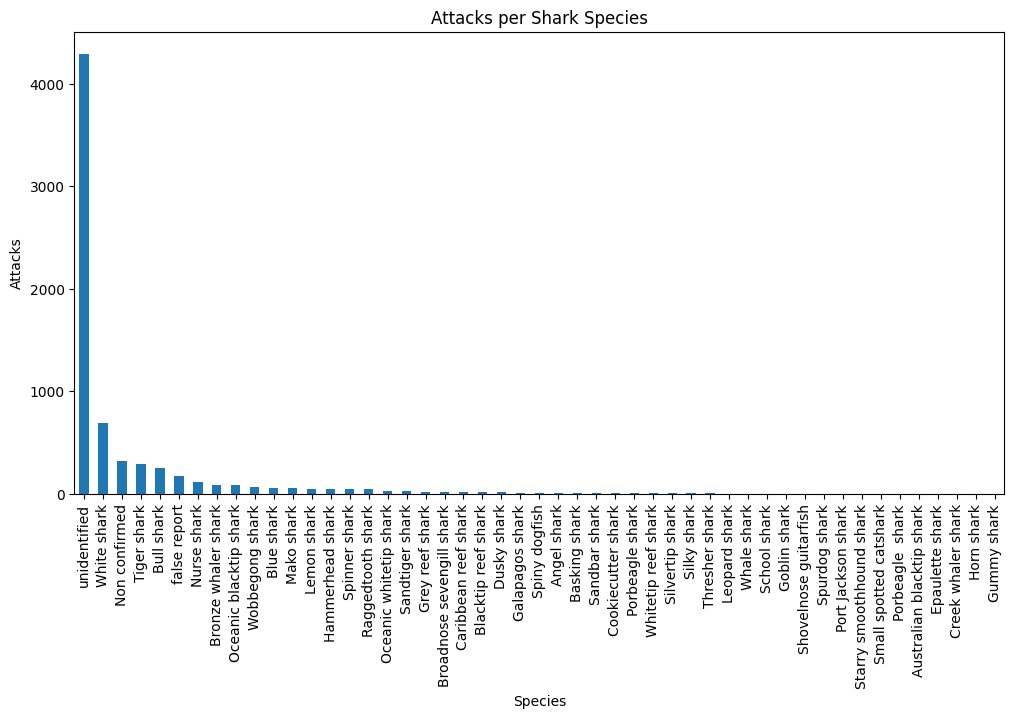

In [ ]:
# Plotting Species

#sharks = sharks[sharks['Species'] != 'unidentified']
species_counts = sharks['Species'].value_counts()
#species_counts_filtered = species_counts[species_counts > 15]

species_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Species')
plt.ylabel('Attacks')
plt.title('Attacks per Shark Species')
plt.xticks(rotation=90)
# plt.show()

# Cleaning the "Type" Column - Matt

In [ ]:
sharks['Type'] = sharks['Type'].replace([], 'Unprovoked')
sharks['Type'] = sharks['Type'].replace([], 'Provoked')
sharks['Type'] = sharks['Type'].replace(['Watercraft','Boat'], 'Sea Disaster')
sharks['Type'] = sharks['Type'].replace(['Invalid','Questionable','?','Unconfirmed','Unverified'], 'Under investigation')

In [ ]:
typies = sharks['Type'].value_counts()
typies

Unprovoked             5076
Provoked                632
Sea Disaster            603
Under investigation     576
Name: Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Unprovoked'),
  Text(1, 0, 'Provoked'),
  Text(2, 0, 'Sea Disaster'),
  Text(3, 0, 'Under investigation')])

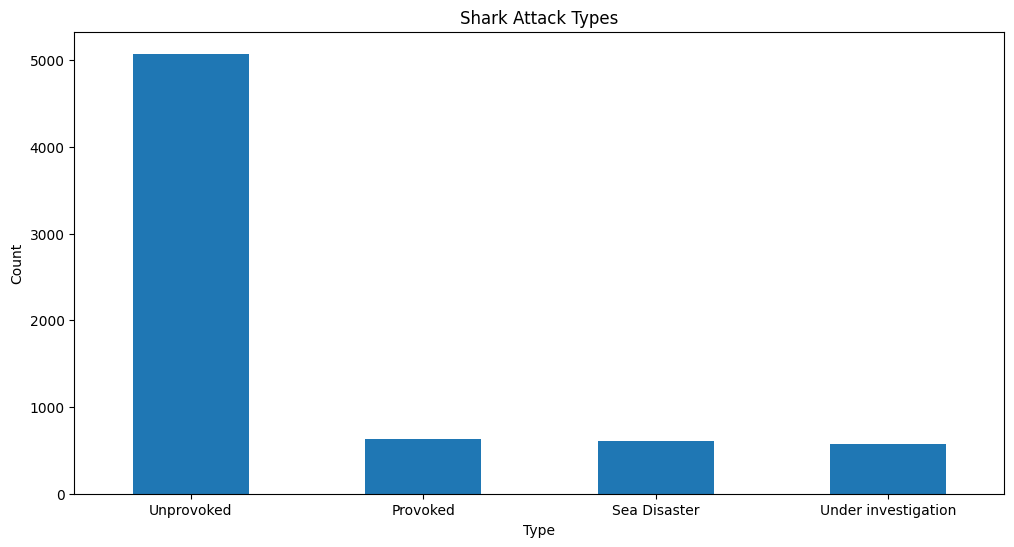

In [ ]:
# Visualizing Types

#sharks = sharks[sharks['Type'] != 'Unprovoked']
type_counts = sharks['Type'].value_counts()

# Create a bar plot
type_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Shark Attack Types')
plt.xticks(rotation=0)
# plt.show()

# Cleaning the "State" Variable - Matt

In [ ]:
staties = sharks['State'].value_counts()
# staties

In [ ]:
def maid_service(state):
    if isinstance(state, str):
        state = re.sub(r'\s+', ' ', state.strip())
        state = re.sub(r'\d+\s*(miles|km|nm)', '', state, flags=re.IGNORECASE)  # Remove distances
        state = re.sub(r'\s+', ' ', state.strip())
        state = re.sub(r'\boff\b', '', state, flags=re.IGNORECASE)  # Remove 'off'
        state = re.sub(r'\s+', ' ', state.strip())
        state = re.sub(r'\?', '', state)
        state = re.sub(r'\s+', ' ', state.strip())
        state = re.sub(r'[()]', '', state)
        state = re.sub(r'\s+', ' ', state.strip())
        state = re.sub(r',', '', state)
        state = re.sub(r'\s+', ' ', state.strip())
        state = re.sub(r'"', '', state)
        state = re.sub(r'\s+', ' ', state.strip())
        state = re.sub(r'\.(?!\d)', '', state)  # Remove periods not followed by a digit
        state = re.sub(r'\s+', ' ', state.strip())
        return state
    else:
        return state

sharks['State'] = sharks['State'].apply(maid_service)

In [ ]:
staties = sharks['State'].value_counts()
# staties

# Cleaning the "Country" Variable - Matt

In [ ]:
countries = sharks['Country'].value_counts()
# countries

In [ ]:
sharks['Country'] = sharks['Country'].apply(maid_service)

In [ ]:
countries = sharks['Country'].value_counts()
#countries

# Cleaning the "Injury" Variable - Matt

In [ ]:
hurt = sharks['Injury'].value_counts()
#hurt

In [ ]:
sharks['Injury'] = sharks['Injury'].apply(maid_service)

In [ ]:
def find_body_part(injury_description, body_parts):
    injury_description = str(injury_description).lower()
    for part in body_parts:
        if part.lower() in injury_description:
            return part
    return 'Other'

body_parts = ['Other', 'Left', 'Right', 'Leg', 'Foot', 'Hand', 'Arm', 'Thigh', 'Calf', 'Ear',
                      'Ankle', 'Knee', 'Head', 'Torso', 'Shoulder', 'Fingers', 'Heel', 'Abdomen',
                      'Back', 'Hip', 'Wrist', 'Face', 'Shin', 'Buttocks', 'Toes', 'Teeth', 'Elbow',
                      'Thumb', 'Nose', 'Neck', 'Rib', 'Groin', 'Jaw', 'Chin', 'Cheek', 'Eye', 'Scalp',
                      'Trunk', 'Arch', 'Pelvis', 'Ring finger', 'Femur']


# Apply the function to the 'Injury' column
sharks['Injury'] = sharks['Injury'].apply(lambda x: find_body_part(x, body_parts))

# Display the result
body_part_counts = sharks['Injury'].value_counts()
# print(body_part_counts)

# Cleaning the "Date" Variable

In [ ]:
a_list = []

sharks["Date"] = sharks["Date"].astype(str)

for date in sharks["Date"]:
    date = date.strip('\n')
    date = date.replace(' ', '')
    date = date.replace('-', '')
    date = date.replace('Reported', '')
    date = date.replace('Nox', 'Nov')
    date = date.replace('2017.06.05', '05Jun2017')
    date = date.replace('June', 'Jun')
    date = date.replace('July', 'Jul')
    date = date.replace('December2012', '01Dec2012')
    date = date.replace('190Feb2010', '19Feb2010')
    date = date.replace('2008.01.30', '30Jan2008')
    date = date.replace('November2011', '01Nov2011')
    date = date.replace('19Jul2007.b', '19Jul2007')
    date = date.replace('19Jul2007.a', '19Jul2007')
    date = date.replace('Early', '01')
    date = date.replace('Late', '30')
    date = date.replace('19Jul2004tohavehappened"ontheweekend"', '19Jul2004')
    date = date.replace('Lastincidentof1994inHongKong', '31Dec1994')
    date = date.replace('BetweenMay&Nov1993', '16July1993')
    date = date.replace('MidJul1985ormidJul1986', '16Jul1985')
    date = date.replace('26Jul1975.b', '26Jul1975')
    date = date.replace('12301980', '30Dec1980')
    if len(date) == 7 and date[0].isdigit() == False:
        date = '01' + date
    if (date[0].isdigit() == True) and (date[1].isdigit() == False):
        date = '0' + date
    if (len(date) == 8) and (date[-4].isdigit() == False):
        date = date.replace('10Jul202', '10Jul2020')
    if (len(date) == 8) and (date[2].isdigit() == False):
        date = '0' + date
    if len(date) == 4:
        date = '01Jan' + date
    if len(date) == 10 and date[2].isdigit == True:
        date = date.replace(date[2], '')
    if date.endswith('.') == True:
        date = date.replace('.', '')
    if 'Summerof' in date:
        date = date.replace('Summerof', '20Jun')
    if 'Summer' in date:
        date = date.replace('Summer', '20Jun')
    if 'Winter' in date:
        date = date.replace('Winter', '21Dec')
    if 'Ca.' in date:
        date = date.replace('Ca.', 'Jan')
    if 'Circa' in date:
        date = date.replace('Circa', '01Jan')
    if 'Before' in date and len(date) == 10:
        year = date[-4:]
        year = int(year)
        new_year = year-1
        new_year = str(new_year)
        date = date.replace('Before', '01Jan')
        date = date.replace(date[-4:],new_year)
    if 's' in date and len(date) == 5:
        year = date[:4]
        date = '01Jan'+ year
    if len(date) == 17 and 'Before' in date:
        year = date[-4:]
        year = int(year)
        new_year = year - 1
        new_year = str(new_year)
        date = '01Jan' + new_year
    if 'October' in date and len(date) == 11:
        year = date[-4:]
        date = '01Oct' + year
    if len(date) == 7  or len(date) == 8 or len(date) == 9 and 'BC' in date:
        date = '01Jan2050'
    if len(date) == 20  and 'Nodate,Before' in date:
        date = date.replace('Nodate,Before', '01')
    if len(date) == 15  and 'Before' in date:
        date = date.replace('Before', '')
    if len(date) == 6 and 'Nodate' in date:
        date = date.replace('Nodate', '01Jan2050')
    if len(date) == 4 and '2007' in date:
        date = date.replace('2007', '01Jan2007')
    if '1600' in date or '1595' in date or '1555' in date or '1554' in date or '1543' in date or '1588' in date or '1640' in date:
        date = '01Jan2050'
    if '1638' in date or '1637' in date or '1617' in date or '1642' in date:
        date = '01Jan2050'
    date = date.replace('0Fall2008', '22Sep2008')
    date = date.replace('0Apr1978`', '01Apr1978')
    date = date.replace('0Fall1993','21Sep1993')
    date = date.replace('16July1993','16Jul1993')
    date = date.replace('301970s', '01Jan1970')
    date = date.replace('3001Jan1970', '30Jan1970')
    date = date.replace('13or30May1967', '13May1967')
    date = date.replace('MidAug1966', '15Aug1966')
    date = date.replace('MayJun1965', '01May1965')
    date = date.replace('011965', '01Jan1965')
    date = date.replace('011963', '01Jan1963')
    date = date.replace('JanJun1962', '01Jan1962')
    date = date.replace('01summer1960','20Jun1960')
    date = date.replace('301960s', '01Jan1960')
    date = date.replace('19601961', '01Jan1961')
    date = date.replace('Between10and12Sep1959', '11Sep1959')
    date = date.replace('21764', '17Feb1964')
    date = date.replace('JultoSep1959', '01Aug1959')
    date = date.replace('19581959', '01Jan1959')
    date = date.replace('19955', '01Jan1955')
    date = date.replace('1954(samedayas1954.00.00.f)', '01Jan1954')
    date = date.replace('19521954', '01Jan1952')
    date = date.replace('1951.12.15.R', '15Dec1951')
    date = date.replace('Between01Aug1951&08Aug1951', '04Aug1951')
    date = date.replace('1950.07.19', '19Jul1950')
    date = date.replace('19501951', '01Jan1951')
    date = date.replace('Mar1949orApr1949', '01Mar1949')
    date = date.replace('13Mar1948"Bittenlastweekend', '13Mar1948')
    date = date.replace('Between18&22Dec1944', '20Dec1944')
    date = date.replace('SometimebetweenApr&Nov1944', '01Aug1944')
    date = date.replace('02Mar1943to07Mar1943', '05Mar1943')
    date = date.replace('11Sep1942to16Sep1942', '13Sep1942')
    date = date.replace('WoirldWarII', '01Sep1939')
    date = date.replace('Sometimebetween08Jan1928&21Jan1928', '20Jan2928')
    date = date.replace('07Mar1925or27Mar1925', '16Mar1925')
    date = date.replace('April', 'Apr')
    date = date.replace('March', 'Mar')
    date = date.replace('Decp', 'Dec')
    date = date.replace('Sept', 'Sep')
    date = date.replace('tohavetakenplacein1919','01Jan1919')
    date = date.replace('14Nov1909to19Nov1909', '16Nov1909')
    date = date.replace('.22Feb1902', '22Feb1902')
    date = date.replace('011900s', '01Jan1900')
    date = date.replace('MidOct1901', '16Oct1901')
    date = date.replace('1899DuringtheSeigeofLadysmith', '01Jan1899')
    date = date.replace('1898.01.24', '24Jan1898')
    date = date.replace('1898(soonafterthecloseoftheSpanishAmericanWar)', '01Jan1898')
    date = date.replace('18981899', '01Jan1899')
    date = date.replace('Reportd15Jul1894', '15Jul1894')
    date = date.replace('06261890', '26Jun1890')
    date = date.replace('MidAug1886', '15Aug1886')
    date = date.replace('14Sep1883(probablyhappenedJan1843/1844)', '14Sep1883')
    date = date.replace('Reprted05Jan1882', '05Jan1882')
    date = date.replace('1880?', '01Jan1880')
    date = date.replace('Janmid1870s', '01Jan1875')
    date = date.replace('NovorDec1873', '01Nov1873')
    date = date.replace('011870s', '01Jan1870')
    date = date.replace('24Oct1888,buttookplacearound1868', '24Oct1888')
    date = date.replace('1868(?)', '01Jan1868')
    date = date.replace('SeporOct1853', '01Sep1853')
    date = date.replace('1853or1854', '01Jan1853')
    date = date.replace('"AnniversaryDay"22Jan1850or1852', '22Jan1850')
    date = date.replace('in1847', '01Jan1847')
    date = date.replace('1844.07.16.R', '16Jul1844')
    date = date.replace('1839/1840', '01Jan1839')
    date = date.replace('1836.07.26.R', '26Jul1836')
    date = date.replace('183600', '01Jan1836')
    date = date.replace('JanNov1826', '01Jan1826')
    date = date.replace('Aug241806', '24Aug1806')
    date = date.replace('May171803', '17May1803')
    date = date.replace('Apr131802', '13Apr1802')
    date = date.replace('May281797', '28May1797')
    date = date.replace('301600s1728', '01Jan1600')
    date = date.replace('Letterdated10Jan1580', '01Jan2050')
    date = date.replace('Ca1588.04.00', '01Apr1588')
    date = date.replace('Ca12001500AD', '01Jan2050')
    date = date.replace('Jan7891033A.D', '01Jan2050')
    date = date.replace('Priorto1988', '01Jan1988')
    date = date.replace('After2013', '01Jan2014')
    date = date.replace('1990or1991', '01Jan1990')
    date = date.replace('BeforeOct2009','01Jan2008')
    date = date.replace('2009?', '01Jan2009')
    date = date.replace('18801899', '01Jan1880')
    date = date.replace('Beforer1994', '01Jan1994')
    date = date.replace('18961913', '01Jan1896')
    date = date.replace('Before08Jun1912', '08Jun1912')
    date = date.replace('Nodate,late1960s', '01Dec1960')
    date = date.replace('2003?', '01Jan2003')
    date = date.replace('WorldWarII', '07Dec1941')
    date = date.replace('Saidtobe19411945,morelikely1945', '01Jan1941')
    date = date.replace('Nodate(3daysafterprecedingincident)&priorto19Jul1913', '19Jul1913')
    date = date.replace('Between1918&1939', '01Jan1918')
    date = date.replace('Nodate,AfterAugust1926andbefore1936', '01Aug1926')
    date = date.replace('BeforeFeb1998', '01Feb1997')
    date = date.replace('BeforeMar1956', '01Mar1955')
    date = date.replace('Afewyearsbefore1938', '01Jan1936')
    date = date.replace('"Duringthewar"19431945', '01Jan1943')
    date = date.replace('Nodate,Before3Jan1967', '03Jan1966')
    date = date.replace('"Beforethewar"', '01Jan1939')
    date = date.replace('Nodate,Before8May1965', '08May1964')
    date = date.replace('Ca77AD', '01Jan2050')
    date = date.replace('0Ca5AD', '01Jan2050')
    date = date.replace('`', '')
    date = date.replace('01Jun1018', '01Jun2018')
    date = date.replace('0Fall1943', '21Sep1943')
    date = date.replace('002Ap2001', '02Apr2001')
    date = date.replace('022Jul144', '22Jul1944')
    date = date.replace('26Sep937', '26Sep1937')
    date = date.replace('008Ap1936', '08Apr1936')
    date = date.replace('20Jan2928', '20Jan1928')
    a_list.append(date)

In [ ]:
# Creating a new variable called 'new_date' that will be used to create the new date column
sharks['new_date'] = pd.Series(a_list)
# Converting the date to be in the dd-mmm-yyy format
sharks['new_date'] = pd.to_datetime(sharks['new_date'], format='%d%b%Y').dt.strftime('%d-%b-%Y')
#
sharks["new_date"] = pd.to_datetime(sharks['new_date'])

# Cleaning the "Fatality" Variable - Nick

In [ ]:
# With the 'Fatality' Variable, we want determine if the shark attack was Fatal (Yes) or Not (No), or if we may
# we are also "Unsure" of the outcome

# Yes
sharks['Fatality'] = sharks['Fatality'].replace('Y', 'Yes')
sharks['Fatality'] = sharks['Fatality'].replace('Y x 2', 'Yes')
sharks['Fatality'] = sharks['Fatality'].replace(2017, 'Yes')
sharks['Fatality'] = sharks['Fatality'].replace('y', 'Yes')
sharks['Fatality'] = sharks['Fatality'].replace('F', 'Yes')

# Unsure
sharks['Fatality'] = sharks['Fatality'].fillna('Unsure')
sharks['Fatality'] = sharks['Fatality'].replace('UNKNOWN', 'Unsure')
sharks['Fatality'] = sharks['Fatality'].replace('M', 'Unsure')

# No
sharks['Fatality'] = sharks['Fatality'].replace('N', 'No')
sharks['Fatality'] = sharks['Fatality'].replace(' N', 'No')
sharks['Fatality'] = sharks['Fatality'].replace('N ', 'No')
sharks['Fatality'] = sharks['Fatality'].replace('n', 'No')
sharks['Fatality'] = sharks['Fatality'].replace('Nq', 'No')

# Creating "Year", "Month", "Day" and "Weekday" Variables - Nick

In [ ]:
# Dropping the old date column
sharks = sharks.drop(columns = ['Date', 'Year'])
# Renaming the old date column to be the old date column
sharks.rename(columns = {'new_date':'Date'}, inplace = True)

In [ ]:
# Creating the 'Year' Column
sharks['Year'] = sharks["Date"].dt.year

# Creating the 'Month' variable
sharks['Month'] = sharks["Date"].dt.month
sharks["Month"] = sharks['Month'].replace(1, 'January')
sharks["Month"] = sharks['Month'].replace(2, 'February')
sharks["Month"] = sharks['Month'].replace(3, 'March')
sharks["Month"] = sharks['Month'].replace(4, 'April')
sharks["Month"] = sharks['Month'].replace(5, 'May')
sharks["Month"] = sharks['Month'].replace(6, 'June')
sharks["Month"] = sharks['Month'].replace(7, 'July')
sharks["Month"] = sharks['Month'].replace(8, 'August')
sharks["Month"] = sharks['Month'].replace(9, 'September')
sharks["Month"] = sharks['Month'].replace(10, 'October')
sharks["Month"] = sharks['Month'].replace(11, 'November')
sharks["Month"] = sharks['Month'].replace(12, 'December')

# Getting the day of the month as a variable
sharks['Day'] = sharks["Date"].dt.day

# Getting the day of the week as a variable
sharks['Weekday'] = sharks["Date"].dt.weekday
sharks['Weekday'] = sharks['Weekday'].replace(0, 'Sunday')
sharks['Weekday'] = sharks['Weekday'].replace(1, 'Monday')
sharks['Weekday'] = sharks['Weekday'].replace(2, 'Tuesday')
sharks['Weekday'] = sharks['Weekday'].replace(3, 'Wednesday')
sharks['Weekday'] = sharks['Weekday'].replace(4, 'Thursday')
sharks['Weekday'] = sharks['Weekday'].replace(5, 'Friday')
sharks['Weekday'] = sharks['Weekday'].replace(6, 'Saturday')

# Cleaning the "Location" Variable - Nick

In [ ]:
def clean_word(word):
    if word[:3] == 'Off' or word[:3] == 'off':
        word = word[4:]
    if word[:4] == 'Near' or word[:4] == 'near':
        word = word[5:]
    if 'Durban' in word:
        word = 'Durban'
    if 'Pieda' in word:
        word = 'Piedade'
    if 'Sydney' in word:
        word = 'Sydney'
    if 'Florida' in word:
        word = 'Florida'
    if 'Brisbane' in word:
        word = 'Brisbane'
    if 'Bunbury' in word:
        word = 'Bunbury'
    if 'Port Alfred' in word:
        word = 'Port Alfred'
    if 'Charleston' in word:
        word = 'Charleston'
    if 'Acapulco' in word:
        word = 'Acapulco'
    if 'Bondi' in word:
        word = 'Bondi'
    if 'Townsville' in word:
        word = 'Townsville'
    if 'Galveston' in word:
        word = 'Galveston'
    if 'Coogee' in word:
        word = 'Coogee'
    if 'Port Elizabeth' in word:
        word = 'Port Elizabeth'
    if 'Barrier Reef' in word:
        word = 'Great Barrier Reef'
    if 'Albany' in word:
        word = 'Albany'
    if 'Newcastle' in word:
        word = 'New Castle'
    if 'Lennox' in word:
        word = 'Lennox Head'
    if 'Darwin' in word:
        word = 'Darwin'
    if 'Lake Macquarie' in word:
        word = 'Lake Macquarie'
    if 'Brighton' in word:
        word = 'Brighton'
    if 'Cape Vidal' in word:
        word = 'Cape Vidal'
    if 'Kei River' in word:
        word = 'Kei River Mouth'
    if 'Shatt' in word:
        word = 'Shatt-al-Arab River'
    if 'Parra' in word:
        word = 'Parramatta River'
    if 'Cronulla' in word:
        word = 'Cronulla'
    if 'Glene' in word:
        word = 'Gelnelg'
    if 'Geraldton' in word:
        word = 'Geraldton'
    if 'Port St. John' in word:
        word = "Port St. John's"
    word = word.replace('Marsaskala', 'Marsascala')
    if 'Grand Cay' in word:
        word = 'Grand Cay'
    word = word.replace('Yallingup Lagoon', 'Yallingup')
    if 'Barachois' in word:
        word = 'Barachois'
    if 'Moresby' in word:
        word = 'Port Moresby'
    word = word.replace('Between Bimini & Miami', 'Bimini')
    if 'Umhlanga' in word:
        word = 'Umhlanga Rocks'
    word = word.replace('St Lucie County', 'St. Lucie County')
    if 'Madang' in word:
        word = 'Madang'
    if 'Rewa' in word:
        word = 'Rewa River'
    if 'Ocracoke' in word:
        word = 'Ocracoke'
    if 'Manila' in word:
        word = "Manila"
    word = word.replace('Gonubie River Mouth', 'Gonubie')
    if 'Santa Barbara' in word:
        word = 'Santa Barbara'
    if 'Southport' in word:
        word = 'Southport'
    if 'Key West' in word:
        word = 'Key West'
    word = word.replace('Battle of Guadalcanal', 'Guadalcanal')
    word = word.replace('40 km off Cape Point', 'Cape Point')
    word = word.replace('Playa Mocambo', 'Mocambo')
    word = word.replace('55 miles south of Adelaide', 'Adelaide')
    word = word.replace("Ship's Graveyard off Point Lonsdale", "Point Lonsdale")
    if "Bellambi" in word:
        word = "Bellambi Reef"
    word = word.replace('20 miles from Havana', 'Havana')
    if 'Sharm' in word:
        word = "Sharm el Sheikh"
    if 'Volusia' in word:
        word = 'Volusia County'
    if 'Madras' in word:
        word = 'Madras'
    if 'Gladstone' in word:
        word = 'Gladstone'
    if 'Jupiter' in word:
        word = 'Jupiter'
    word = word.replace('120 miles southeast of New Orleans', 'New Orleans')
    word = word.replace('Boucan Canot', 'Boucan-Canot')
    word = word.replace('30 nautical miles offshore', 'Unknown')
    if 'San Juan' in word:
        word = 'San Juan'
    if 'Molokai' in word:
        word = 'Molokai'
    if 'Miami' in word:
        word = 'Miami'
    if 'Mooloolaba' in word:
        word = 'Mooloolaba'
    word = word.replace('Uilenkraalsmond (near Gansbaai)', 'Gansbaai')
    if 'Honolulu' in word:
        word = 'Honolulu'
    word = word.replace('Ocean City (offshore)', 'Ocean City')
    word = word.replace('50 km off St. Lucia', 'St. Lucia')
    if 'Perth' in word:
        word = 'Perth'
    if 'Miller' in word:
        word = "Miller's Point"
    word = word.replace('Ensenada de la Coronilla', 'Ensenada')
    word = word.replace('5 nm off Cervantes', 'Cervantes')
    word = word.replace('Oyster Stacks near Exmouth12h15', 'Exmouth')
    if 'Moloka' in word:
        word = 'Moloka'
    if 'Crescent' in word:
        word = 'Crescent Head'
    word = word.replace('Arlington Reef near Cairns', 'Arlington Reef')
    word = word.replace('North of Walkers Cay', 'Walkers Cay')
    word = word.replace('150 miles off Cape Henry', 'Cape Henry')
    word = word.replace('2 kilometres off Sagay', 'Sagay')
    word = word.replace('Chicago (Lake Michigan)', 'Lake Michigan')
    if "Canaveral" in word:
        word = "Canaveral"
    word = word.replace('Oahu', "O'ahu")
    word = word.replace("Southwest of O'ahu", "O'ahu")
    word = word.replace('USS Hull DD-350 was one of 3 destroyers that capsized in Typhoon Cobra', 'Unknown')
    word = word.replace('entrance to Dar-es-Salaam Harbour', 'Dar-es-Salaam Harbour')
    word = word.replace("22º08'S  : 178º06'W", 'Unknown')
    word = word.replace('Aircraft went down on 6/12/1944. He survived on raft for 11 days and was 150 miles off Guam when rescued', 'Unknown')
    word = word.replace('10 miles off Cape Maisi', 'Cape Maisi')
    word = word.replace('', '')
    word = word.replace('', '')
    word = word.replace('', '')
    word = word.replace('', '')
    return word

In [ ]:
def clean_island(island):
    island = island.strip(' ')
    if island[:3] == 'Off' or island[:3] == 'off':
        island = island[4:]
    if island[:4] == 'Near' or island[:4] == 'near':
        island = island[5:]
    if 'Singer' in island:
        island = 'Singer Island'
    if 'Thursday' in island:
        island = 'Thursday Island'
    if 'Mustang' in island:
        island = 'Mustang Island'
    if 'Padre' in island:
        island = 'South Padre Island'
    if 'Hutch' in island:
        island = 'Hutchinson Island'
    if 'Rottnest' in island:
        island = 'Rottnest Island'
    if 'Bald' in island:
        island = 'Bald Head Island'
    if 'Palms' in island:
        island = 'Isle of Palms'
    if 'Emerald' in island:
        island = 'Emerald Isle'
    if 'Paw' in island:
        island = "Pawley's Island"
    if 'Sull' in island:
        island = "Sullivan's Island"
    if 'Farall' in island:
        island = 'Farallon Island'
    if 'Lizard' in island:
        island = 'Lizard Island'
    if 'Mab' in island:
        island = 'Mabuiag Island'
    if 'Long Island' in island:
        island = 'Long Island'
    if 'Badu' in island:
        island = 'Badu Island'
    if 'Mason' in island:
        island = 'Masonboro Island'
    if 'Helena' in island:
        island = 'St. Helena Island'
    if 'Catalina' in island:
        island = 'Santa Catalina Island'
    if 'Miguel' in island:
        island = 'San Miguel Island'
    if 'Moreton' in island:
        island = 'Moreton Island'
    if 'Tombo' in island:
        island = 'Tombo Island'
    if 'Wallis' in island:
        island = 'Wallis Island'
    if 'Stewart' in island:
        island = 'Stewart Island'
    if 'Wake' in island:
        island = 'Wake Island'
    if 'Inhaca' in island:
        island = 'Inhaca Island'
    if 'Marshall' in island:
        island = 'Marshall Island'
    island = island.replace('Island J4H', 'Marshall Island')
    if 'Clark' in island:
        island = "Clark's Island"
    if 'Stradbroke' in island:
        island = 'Stradbroke Island'
    if 'Fisherman' in island:
        island = "Fisherman's Island"
    if 'Keppel' in island:
        island = 'Keppel Island'
    if 'Broughton' in island:
        island = 'Broughton Island'
    if 'Twin Islands' in island:
        island = "Twin Islands"
    island = island.replace('Between Unisan & Angadanan Islands', 'Unisan Island')
    island = island.replace('Makira Island (Formerly San Cristobal)', 'Makira Island')
    island = island.replace('Samarai Island (south end)', 'Samarai Island')
    island = island.replace('between Filfla Island and Wied iz-Zurrieq', 'Filfla Island')
    island = island.replace('East of La Grande Island', 'La Grande Island')
    island = island.replace('Lagoon along Sand Island', 'Sand Island')
    island = island.replace('Between Carnac and Garden Islands', 'Carnac Island')
    island = island.replace('90 miles off Albrohos Island', 'Albrohos Island')
    island = island.replace('Achutuppu Island near Ailigandi', 'Achutuppu Island')
    island = island.replace("Fishman's Island (near Port Moresby", "Fishman's Island")
    island = island.replace('2 miles south of Castle Island Harbour entrance to Hamilton', 'Castle Island')
    if 'San Clemente' in island:
        island = 'San Clemente Island'
    if "St. Simon" in island:
        island = "St. Simon's Island"
    island = island.replace('South Bruny Island', 'Bruny Island')
    if 'Savo' in island:
        island = 'Savo Island'
    island = island.replace('Small creek near Coles Island', 'Coles Island')
    island = island.replace('40 miles from Tahane Island', 'Tahane Island')
    island = island.replace('On edge of reef near Warrior Island', 'Warrior Island')
    island = island.replace('Eva Island 20 miles from Cardwell', 'Eva Island')
    island = island.replace('10 miles offshore from Sea Isle City', 'Sea Isle City')
    if 'Garden' in island:
        island = 'Garden Island'
    island = island.replace("Hadrian’s (Haidana?) Island", "Hadrian's Island")
    island = island.replace('500 nautical miles southwest of Johnston Island', 'Johnston Island')
    island = island.replace('North shore of Rey Island', 'Rey Island')
    island = island.replace('360 miles north of Ascension Island', 'Ascension Island')
    if 'Easter' in island:
        island = 'Easter Island'
    if 'Atchin' in island:
        island = 'Atchin Island'
    if 'Tenth' in island:
        island = 'Tenth Island'
    island = island.replace('Between Santa Cruz Island and Santa Barbara', 'Santa Cruz Island')
    island = island.replace("Goats Island (Moku’auia Island)", 'Goats Island')
    island = island.replace('350 miles from Faial Island', 'Faial Island')
    island = island.replace('Nerang River near Chevron Island', 'Chevron Island')
    island = island.replace('33 nautical miles off Othonoi Island', 'Othonoi Island')
    island = island.replace('Cull Island / Esperance', 'Cull Island')
    island = island.replace('Pitt Island or Chatham Island', 'Pitt Island')
    island = island.replace("Brothers' Island", "Brothers Island")
    island = island.replace('Between Ofu & Fafini Islands', 'Ofu Islands')
    island = island.replace('Meteorologic Station on Campbell Island', 'Campbell Island')
    island = island.replace('Reef on seaward side of Geyser Island', 'Geyser Island')
    island = island.replace('Gulf Island National Seashore Park', 'Gulf Island')
    island = island.replace('Pulau Pangkor (Pangkor Island)', 'Pangkor Island')
    island = island.replace('Dando/Kaeui Island','Dando Island')
    island = island.replace('Malakula (Malakula Island)','Malakula Island')
    island = island.replace('East side of Bench Island in the Foveaux Strait','Bench Island')
    island = island.replace('St. George Island (near Apachicola)','St. George Island')
    island = island.replace('11 miles off Dog Island in the Gulf of Mexico','Dog Island')
    if 'Big Island' in island:
        island = 'Big Island'
    island = island.replace('Ten Thousand Islands National Wildlife Refuge','Ten Thousand Islands')
    island = island.replace('Lord Howe Island (island group 440 miles northeast of Sydney)','Lord Howe Island')
    return island

In [ ]:
def clean_harbors(harbor):
    harbor = harbor.strip(' ')
    if 'Charleston' in harbor:
        harbor = 'Charleston Harbor'
    if 'Pearl' in harbor:
        harbor = 'Pearl Harbor'
    if 'Vera' in harbor:
        harbor = 'Vera Cruz Harbor'
    harbor = harbor.replace('Lake Ponchartain off Southshore Harbor', 'Southshore Harbor')
    harbor = harbor.replace('Port Kilindeni / Mombasa Harbor', 'Mombasa Harbor')
    harbor = harbor.replace('Near tuna cannery in Pago Pago Harbor', 'Pago Pago Harbor')
    return harbor

In [ ]:
def clean_bays(bay):
    bay = bay.strip(' ')
    if 'Moreton' in bay:
        bay = 'Moreton Bay'
    if 'False Bay' in bay:
        bay = 'False Bay'
    if 'Coral' in bay:
        bay = 'Coral Bay'
    if 'Phillip' in bay:
        bay = 'Phillip Bay'
    if 'Tampa' in bay:
        bay = 'Tampa Bay'
    if 'Jervis' in bay:
        bay = 'Jervis Bay'
    if 'Streaky' in bay:
        bay = 'Streaky Bay'
    if 'Botany' in bay:
        bay = 'Botany Bay'
    if 'Jeff' in bay:
        bay = "Jeffrey's Bay"
    bay = bay.replace('San Francisco Bay (or San Leandro Bay)', 'San Francisco Bay')
    if 'Anae' in bay:
        bay = 'Anaehoomalu Bay'
    if 'Buffels' in bay:
        bay = 'Buffels Bay'
    bay = bay.replace('West Bay near Galveston', 'Galveston Bay')
    bay = bay.replace('5 km from Gordon’s Bay', "Gordon's Bay")
    bay = bay.replace('A ford known as Brodies Coffin in St. Lucia Bay', 'St. Lucia Bay')
    bay = bay.replace('Hobson Bay', "Hobson's Bay")
    if 'Biscayne' in bay:
        bay = 'Biscayne Bay'
    bay = bay.replace('In a river feeding into the Bay of Bengal', 'Bay of Bengal')
    bay = bay.replace('West of Pukerua Bay', 'Pukera Bay')
    if 'Roebuck' in bay:
        bay = 'Roebuck Bay'
    bay = bay.replace('Whitewood Point on Lloyd Neck in Oyster Bay', 'Oyster Bay')
    bay = bay.replace('Canadian Bay near Mount Eliza', 'Canadian Bay')
    bay = bay.replace('Oatley Bay near Como', 'Oatley Bay')
    bay = bay.replace('In Swan River at Freshwater Bay', 'Freshwater Bay')
    bay = bay.replace('Smelting Works Bay near Hobart', 'Smelting Works Bay')
    bay = bay.replace('Great Barrier Reef  (near Upolu Bay)', 'Upolu Bay')
    bay = bay.replace('Sandy Bay/Whananaki', 'Sandy Bay')
    bay = bay.replace("Between the Kakanui River and Campbell's Bay", "Campbell's Bay")
    bay = bay.replace('Sardinia Bay near Port Elizabeth', 'Sardinia Bay')
    bay = bay.replace('Paradise Bay (next to Wailua Bay)', 'Paradise Bay')
    bay = bay.replace('Caves near Kogel Bay', 'Kogel Bay')
    bay = bay.replace("Children's Bay Cay near Rollerville", "Children's Bay")
    if 'Waiokapua' in bay:
        bay = 'Waiokapua Bay'
    bay = bay.replace('Napoopoo Park in Kealakekua Bay', 'Kealakekua Bay')
    bay = bay.replace('Between Bay Rock & Magnetic Island', 'Bay Rock')
    bay = bay.replace('Hilo Bay Yacht Club', 'Hilo Bay')
    bay = bay.replace('30 nm southeast of Guantanamo Bay', 'Guantanamo Bay')
    bay = bay.replace('Two miles from shore in Tamarind Bay', 'Tamarind Bay')
    bay = bay.replace('Panama Bay 8ºN', 'Panama Bay')
    bay = bay.replace('D’Estrees Bay near Kangaroo Island', "D'Estrees Bay")
    bay = bay.replace('Garden Bay near Cosy Nook', 'Garden Bay')
    bay = bay.replace('Kelpies near Wylie Bay', 'Wylie Bay')
    bay = bay.replace('Off Perforated Island near Coffin Bay', 'Coffin Bay')
    if 'Ntlon' in bay:
        bay = 'Ntlonyana Bay'
    if 'Simon' in bay:
        bay = "Simon's Bay"
    return bay

In [ ]:
def clean_beaches(beach):
    beach = beach.strip(' ')
    if 'New Smyrna Beach' in beach:
        beach = 'New Smyrna Beach'
    beach = beach.replace('New Smyrna  Beach', 'New Smyrna Beach')
    if 'Daytona' in beach:
        beach = 'Daytona Beach'
    if 'Coco' in beach or 'Cocoa' in beach:
        beach = 'Cocoa Beach'
    if 'Myrtle' in beach:
        beach = 'Myrtle Beach'
    if 'Palm' in beach:
        beach = 'Palm Beach'
    if 'Jensen' in beach:
        beach = 'Jensen Beach'
    if 'Jacksonville' in beach:
        beach = 'Jacksonville Beach'
    if 'South Beach' in beach:
        beach = 'South Beach'
    if 'North Beach' in beach:
        beach = 'North Beach'
    if 'Juno' in beach:
        beach = 'Juno Beach'
    if 'Vero' in beach:
        beach = 'Vero Beach'
    if 'Oreti' in beach:
        beach = 'Oreti Beach'
    if 'Miami' in beach:
        beach = 'Miami Beach'
    if 'Shelly' in beach:
        beach = 'Shelly Beach'
    if 'Wrightsville' in beach:
        beach = 'Wrightsville Beach'
    if 'Crescent' in beach:
        beach = 'Crescent Beach'
    if 'Stuart' in beach:
        beach = 'Stuart Beach'
    if 'Back' in beach:
        beach = 'Back Beach'
    if 'Avoca' in beach:
        beach = 'Avoca Beach'
    if 'Bondi' in beach:
        beach = 'Bondi Beach'
    if 'Tiger' in beach:
        beach = 'Tiger Beach'
    if 'Carolina' in beach:
        beach = 'Carolina Beach'
    if 'Paradise' in beach:
        beach = 'Paradise Beach'
    if 'Mere' in beach:
        beach = 'Merewether Beach'
    if 'Holden' in beach:
        beach = 'Holden Beach'
    if 'Augustine' in beach:
        beach = 'St. Augstine Beach'
    if 'Newport' in beach:
        beach = 'Newport Beach'
    if 'Kingscl' in beach:
        beach = 'Kingscliffe Beach'
    if 'Boynton' in beach:
        beach = 'Boynton Beach'
    if 'Wailea' in beach:
        beach = 'Wailea Beach'
    if 'Cheynes' in beach:
        beach = 'Cheynes Beach'
    if 'Neptune' in beach:
        beach = 'Neptune Beach'
    if 'Avalon' in beach:
        beach = 'Avalon Beach'
    beach = beach.replace('Off City Beach', 'City Beach')
    beach = beach.replace('Off Blacksmith Beach', 'Blacksmith Beach')
    if 'Satellite' in beach:
        beach = 'Satellite Beach'
    if 'Topsail' in beach:
        beach = 'Topsail Beach'
    beach = beach.replace("Knobby's Beach", "Nobby's Beach")
    beach = beach.replace('Yorkey’s Knob Beach near Cairns', "Nobby's Beach")
    if 'Salmon' in beach:
        beach = 'Salmon Beach'
    if 'Bathtub' in beach:
        beach = 'Bathtub Beach'
    if 'Golden' in beach:
        beach = 'Golden Beach'
    if 'Ocean Grove' in beach:
        beach = 'Ocean Grove Beach'
    if 'Cactus' in beach:
        beach = 'Cactus Beach'
    if 'First' in beach:
        beach = 'First Beach'
    if 'Park Beach' in beach:
        beach = 'Park Beach'
    if 'Turtle' in beach:
        beach = 'Turtle Beach'
    if 'Cocal' in beach:
        beach = 'Cocal Beach'
    if 'Deerfield' in beach:
        beach = 'Deerfield Beach'
    if 'Public' in beach:
        beach = 'Public Beach'
    if 'Makaha' in beach:
        beach = 'Makaha Beach'
    if 'Jupiter' in beach:
        beach = 'Jupiter Beach'
    beach = beach.replace('Gold  Beach', 'Gold Beach')
    beach = beach.replace('Atlantiic Beach', 'Atlantic Beach')
    if 'Pompano' in beach:
        beach = 'Pompano Beach'
    if 'Redondo' in beach:
        beach = 'Redondo Beach'
    if 'Crystal' in beach:
        beach = 'Crystal Beach'
    if 'Key Colony' in beach:
        beach = 'Key Colony Beach'
    beach = beach.replace('Artifical reef 3 miles off Manatee Beach', 'Manatee Beach')
    if 'Makua Beach' in beach:
        beach = 'Makua Beach'
    beach = beach.replace('Kings Beach', "King's Beach")
    if 'Pirate' in beach:
        beach = 'Pirates Beach'
    if 'Narrabeen Beach' in beach:
        beach = 'Narrabeen Beach'
    if 'Elbow' in beach:
        beach = 'Elbow Beach'
    if 'Native' in beach:
        beach = 'Native Beach'
    beach = beach.replace('LaPlaya Beach / Vedado', 'LaPlaya Beach')
    beach = beach.replace('Left break at the ‘Hot Spot’ at Sheringa Beach', 'Sheringa Beach')
    beach = beach.replace('Near the wreck of the Kakapo off Noordhoek Beach', 'Noordhoek Beach')
    if 'ole B' in beach:
        beach = "Kama'ole Beach Park"
    beach = beach.replace('Between Magic Sands Beach and Kahaluu Beach on the Kona coast', 'Magic Sands Beach')
    if 'Bren' in beach:
        beach = 'Brennecke Beach'
    beach = beach.replace('Cove Beach / Kalama Beach', 'Kamala Beach')
    beach = beach.replace('Pialba Beach near Maryborough', 'Pialba Beach')
    beach = beach.replace('Fourth Beach / Twilgth Beach', 'Fourth Beach')
    if 'Sea Pines' in beach:
        beach = 'Sea Pines Beach'
    if 'Topanga' in beach:
        beach = 'Topanga Beach'
    if 'Trinidad' in beach:
        beach = 'Trinidad Beach'
    if 'Nimitz' in beach:
        beach = 'Nimitz Beach'
    beach = beach.replace("North of main swimming area in Waterman's Bay Beach", "Waterman's Bay Beach")
    beach = beach.replace('North end of County Beach', 'County Beach')
    beach = beach.replace('2 miles east of Dania Beach', 'Dania Beach')
    beach = beach.replace('Off Macassar Beach', 'Macassar Beach')
    beach = beach.replace('7 Mile Beach', 'Seven Mile Beach')
    beach = beach.replace('Off Tapuna Beach', 'Tapuna Beach')
    beach = beach.replace('Escalerio Beach Balneário Camboriú', 'Escalerio Beach')
    beach = beach.replace('Between Pescadero Point & Bean Hollow Beach', 'Bean Hollow Beach')
    if 'Falcon' in beach:
        beach = 'Falcon Beach'
    if 'Del Mar' in beach:
        beach = 'Villa del Mar Beach'
    if 'Royal' in beach:
        beach = 'Chateau Royal Beach'
    beach = beach.replace('Kelp Beds Beach (Kelpies)', 'Kelp Beds Beach')
    beach = beach.replace('13th Beach', 'Thirteenth Beach')
    beach = beach.replace('Kanaha Beach Park', 'Kanaha Beach')
    beach = beach.replace('Between Dyer Island and Pearly Beach', 'Pearly Beach')
    beach = beach.replace('Umm Suqeim Beach', 'Suqeim Beach')
    beach = beach.replace('100 miles off Ft. Myers Beach', 'Fort Meyers Beach')
    beach = beach.replace('Tyrendarra Beach near Portland', 'Tyrendarra Beach')
    if 'Jimmy' in beach:
        beach = "Jimmy's Beach"
    if 'Gaviota' in beach:
        beach = 'Gaviota Beach'
    return beach

In [ ]:
# Cleaning the Location Column
sharks['Location'] = sharks['Location'].fillna('Unknown')

location_list = []

# Iterating through each location
for location in sharks['Location']:
    # General Replacements that need to be done
    location = location.replace('Baay', 'Bay')
    # Splitting the values on a comma (,)
    location = location.split(',')
    # If the word beach is in any of the tokens, use that token.
    if 'Unknown' in location[0]:
        location = location[0]
    # This adds all of the first instances of the word beach into a list
    if len(location) >= 1 and 'Beach' in location[0]:
        location = location[0]
        clean_beaches(location)
    if len(location) >= 2 and 'Beach' in location[1]:
        location = location[1]
        clean_beaches(location)
    elif len(location) >= 1 and 'Bay' in location[0]:
        location = location[0]
        clean_bays(location)
    elif len(location) >= 2 and 'Bay' in location[1]:
        location = location[1]
        clean_bays(location)
    elif len(location) >= 1 and 'Harbor' in location[0]:
        location = location[0]
        clean_harbors(location)
    elif (len(location) >= 1 and 'Island' in location[0]) or (len(location) >= 1 and 'Isle' in location[0]):
        location = location[0]
        clean_island(location)
    elif len(location) == 1:
        location = location[0]
        clean_word(location)
    elif len(location) == 2:
        location = location[0]
    elif len(location) == 3:
        location = location[0]
    elif type(location) == 'list' and len(location) == 4:
        location = location[0]
    location_list.append(location)


In [ ]:
sharks["new_location"] = pd.Series(location_list)
sharks.drop(columns = ['Location'], axis = 1, inplace = True)
sharks.rename({"new_location":"Location"}, axis = 1, inplace = True)
sharks.head()

,Type,Country,State,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Date,Year,Month,Day,Weekday,Location
0,Unprovoked,USA,Hawaii,Surfing,Kevin Kanehe,M,50,Left,No,16h00,Tiger shark,2023-10-15,2023,October,15,Saturday,Hanalei Bay
1,Under investigation,USA,California,Surfing,male,M,52,Left,Unsure,15h45,unidentified,2023-10-13,2023,October,13,Thursday,Pacific State Beach
2,Unprovoked,USA,Hawaii,Surfing,K. Cole,F,45,Other,No,13h00,unidentified,2023-10-02,2023,October,2,Sunday,Paia
3,Unprovoked,AUSTRALIA,South Australia,Swimming,Pamela Cook,F,64,Leg,No,07h45,unidentified,2023-10-01,2023,October,1,Saturday,Beachport
4,Unprovoked,USA,California,Swimming,Felix Louis N'Jai,M,52,Other,Yes,10h40,unidentified,2023-10-01,2023,October,1,Saturday,Wildcat Beach


In [ ]:
#bailey code

In [ ]:
#df = sharks

In [ ]:
def mass_replace(df,column,matches_replacements):
  '''
  Replaces every key from matches_replacements dict with the corresponding value

  '''
  if not len(matches_replacements):
    raise ValueError('Length of arguments 0. Please give something to replace')

  if type(matches_replacements) != dict:
    raise TypeError('Matches_replacements must be of type dict')

  types=[list,tuple,dict]
  for key,value in matches_replacements.items():
    if type(key) in types or type(value) in types:
      raise TypeError('''When iterating through keys and values, none of the
      individual keys or values should be an interable''')

    try:
      df[column].replace({key:value},regex=True,inplace=True)

    except:
      print(f'the key, value causing the error are {key},{value}')

In [ ]:
def clean_sex_column(df):

    pattern1=r'&|passengers|crew\b|occupants|males\b|Occupants|people|men\b|children|others?\b|migrants|immigrants|couple\b|refugees\b|slaves|poachers|tourists|swimmers'
    mask=df.Name.str.contains(pattern1,regex=True)
    df.Sex[(mask)&(df.Sex.isnull())]='multiple'

    return df

In [ ]:
def give_enumerated_dict_from_list(list_of_words):


    dictionary_of_word_index={}

    for i,word in enumerate(list_of_words):
        dictionary_of_word_index[word]=i

    return dictionary_of_word_index

def remove_stopwords(string):
    if pd.isna(string):
        string=''
    if type(string) != str:
        raise ValueError(f'object is of type {type(string)}, object is {string}')

    tokenized_list=nltk.word_tokenize(string)

    stopwords_dict=give_enumerated_dict_from_list(stopwords.words('english'))
    tokenized_dict=give_enumerated_dict_from_list(tokenized_list)

    no_stopwords_list=[]
    for word in tokenized_dict.keys():
        if not stopwords_dict.get(word,False):
            no_stopwords_list.append(word)

    return no_stopwords_list

def pos_tag_verb_selection(string):
    string=remove_stopwords(string)

    tagged_string=nltk.pos_tag(string)

    list_of_only_verbs=[]

    for word,pos in dict(tagged_string).items():
        if 'V' in pos:
            list_of_only_verbs.append(word)

    list_of_only_lemma=[]

    for word in list_of_only_verbs:
        list_of_only_lemma.append(lemmatizer.lemmatize(word.lower(),'v'))

    return list_of_only_lemma


In [ ]:
def len_detect_before_split(word_list):

    if len(word_list)>1:
        return ','.join(word_list)
    elif len(word_list)==1:
        return word_list[0]
    else:
        return np.nan

In [ ]:
def name_cleaner(string):
    if type(string)!=str:
        return np.nan
    try:
        string=string.lower()
        string= string.split(' ')
        return string[0]
    except:
        print(string)
        return np.nan

In [ ]:
mass_replace(df,'Sex',{r'.*M.*':'M','lli':'M',r'\.': np.nan,'N':'M'})

In [ ]:
sharks=clean_sex_column(sharks)

<ipython-input-313-bf97452c39ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[(mask)&(df.Sex.isnull())]='multiple'


In [ ]:
lemmatizer=WordNetLemmatizer()

# Cleaning the "Activity" Variable - Bailey

In [ ]:
sharks['Activity_tokens']=sharks.Activity.apply(pos_tag_verb_selection)

In [ ]:
sharks['Activities_token_strings']=sharks.Activity_tokens.apply(len_detect_before_split)

In [ ]:
activities_series=df.Activities_token_strings.value_counts()

In [ ]:
activities_dict={}
for index,value in zip(activities_series.index,activities_series.values):
    if len(index.split(','))==1:
        if activities_dict.get(index,False):
            activities_dict[index]+=value
        else:
            activities_dict[index]=value
    if len(index.split(','))>1:
        for word in index.split(','):
            if activities_dict.get(word,False):
                activities_dict[word]+=value
            else:
                activities_dict[word]=value

In [ ]:
activities_df=pd.Series(activities_dict).sort_values(ascending=False).reset_index()

In [ ]:
activities_df=activities_df[activities_df[0]>8]

In [ ]:
activities_df['index'].iloc[5]='wade'
activities_df['index'].iloc[6]='bathe'
activities_df[0].iloc[5]+=activities_df[0].iloc[7]
activities_df[0].iloc[4]+=activities_df[0].iloc[8]
activities_df[0].iloc[0]+=activities_df[0].iloc[9]
activities_df[0].iloc[12]+=activities_df[0].iloc[10]
activities_df[0].iloc[12]+=activities_df[0].iloc[21]
activities_df.drop([7,8,9,10,21,11,15,18,19,20,22,23,24,27,28,29,30,31,33,34,35,37,38,40,41,43,44,45,46,47,51,52],axis=0,inplace=True)

<ipython-input-326-25d72a8ab005>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df['index'].iloc[6]='bathe'
<ipython-input-326-25d72a8ab005>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df[0].iloc[4]+=activities_df[0].iloc[8]
<ipython-input-326-25d72a8ab005>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df[0].iloc[0]+=activities_df[0].iloc[9]
<ipython-input-326-25d72a8ab005>:6: SettingWithCopyW

In [ ]:
activities_df=activities_df.sort_values(by=0,ascending=False).reset_index().drop(['level_0'],axis=1)
activities_df.rename(columns={'index':'Activity',0:'Count'},inplace=True)

In [ ]:
activities_df.drop([16,17,18,19,20],inplace=True)

In [ ]:
mass_replace(sharks,'Time',{r'oo':'00',r'A':'',r'(?i)mid':'',r'(?i)late':'',
                        r'(?i)early':'',
                        r' (?i)(Sunset)':'',
                        r'(?i)fall':'',
                        r'(?i)Morning':'09:50',
                        r'(?i)M':'09:50',
                        r'(?i)A.M.':'09:50',
                        r'(?i)Before ':'',
                        r'(?i)shortly ':'',
                        r'(?i)Prior to ':'',
                        r'(?i)After ':'',
                        r'(?i)Just ':'',
                        r'(?i)daybreak':'06:00',
                        r'(?i)evening':'18:00',
                        r'(?i)sundown':'18:00',
                        r'(?i)sunset':'18:00',
                        r'" (?i)evening"':'18:00',
                        r'(?i)dusk':'18:00',
                        r'(?i)dawn':'06:00',
                        r'(?i)Night':'21:00',
                        r'(?i)Dark':'21:00',
                        r'(?i)h':':',
                        r'(?i)Afternoon':'14:00',
                        r'(?i)Afternon':'14:00',
                        r'(?i)Midday':'12:00',
                        r'(?i)noon':'12:00',
                        r'(?i)day.':'12:00',
                        r'(?i)day':'12:00',
                        r'(?i)Between (\d\d:\d\d) and (\d\d:\d\d)':'\\1',
                        r'(?i)Between (\d\d:\d\d) to (\d\d:\d\d)':'\\1',
                        r'(\d\d:\d\d) to (\d\d:\d\d)':'\\1',
                        r'(\d\d)(\d\d)':'\1:\\2',
                        r'(?i)Between (\d\d:\d\d) & (\d\d:\d\d)':'\\1',
                        r'(\d\d:\d\d)-{1,2}\d\d:\d\d':'\\1',
                        r'(\d\d:\d\d) - \d\d:\d\d':'\\1',
                        r'(\d\d:\d\d) -\d\d:\d\d':'\\1',
                        r'(\d\d:\d\d) -- \d\d:\d\d':'\\1',
                        r'(\d\d:\d\d) or \d\d:\d\d':'\\1',
                        r'(\d\d:\d\d) / \d\d:\d\d':'\\1',
                        r'(\d\d:\d\d)\(\d\d:\d\d\)':'\\1',
                        r'" ':'',
                        r'"':'',
                        r'P\.':'',
                        r'\.':'',
                        r'>':'',
                        r'<':'',
                        r'j':'',
                        r'-':'',
                        r'`':'',
                        r' ':'',
                        r'':''})

In [ ]:
sharks.Time.iloc[5600]=np.nan
sharks.Time.iloc[5308]='03:10'
sharks.Time.iloc[5289]='11:01'
sharks.Time.iloc[5208]='18:00'
sharks.Time.iloc[5057]=np.nan
sharks.Time.iloc[4988]='21:00'
sharks.Time.iloc[4187]='13:00'
sharks.Time.iloc[4030]=np.nan
sharks.Time.iloc[3667]='09:50'
sharks.Time.iloc[3291]=np.nan
sharks.Time.iloc[3124]=np.nan
sharks.Time.iloc[2764]=np.nan
sharks.Time.iloc[2603]=np.nan
sharks.Time.iloc[1692]='15:45'
sharks.Time.iloc[1675]='12:00'
sharks.Time.iloc[1535]='09:50'
sharks.Time.iloc[1050]='06:00'
sharks.Time.iloc[613]='19:00'
sharks.Time.iloc[328]='14:15'

<ipython-input-330-953fc01c30dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Time.iloc[5600]=np.nan
<ipython-input-330-953fc01c30dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Time.iloc[5308]='03:10'
<ipython-input-330-953fc01c30dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Time.iloc[5289]='11:01'
<ipython-input-330-953fc01c30dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
def splitter(string):
  if string!= string:
    return np.nan
  if string == '':
    return np.nan
  string=str(string)
  tme=string.split(':')[0]
  tme= tme+':00'
  return tme

sharks.Time=sharks.Time.apply(splitter)

for time in sharks.Time:

  try:
    pd.to_datetime(time)
  except:
    try:
      sharks.Time[sharks.Time==str(time)]=np.nan
    except:
      raise ValueError('Something went wrong')

<ipython-input-331-e13e4f11b5a6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Time[sharks.Time==str(time)]=np.nan


In [ ]:
sharks.Age

0                            50
1                            52
2                            45
3                            64
4                            52
5                           NaN
6                            34
7                            38
8                           NaN
9                           NaN
10                          NaN
11                          30s
12                           37
13                           44
14                            9
15                           19
16                        20/30
17                           35
18                          NaN
19                           65
20                           22
21                           22
22                           26
23                          20s
24                           77
25                           60
26                           38
27                           49
28                           21
29                          NaN
30                           42
31      

In [ ]:

sharks.Age.replace({r'(\d{1,2}) or \d{1,2}':'\g<1>'},regex=True,inplace=True)
sharks.Age.replace({r'(\d{1,2}) to \d{1,2}':'\g<1>'},regex=True,inplace=True)
sharks.Age.replace({r'"?(?i)young"?':np.nan},inplace=True,regex=True)
sharks.Age.replace({r'"?(?i)adult"?':np.nan},inplace=True,regex=True)
sharks.Age.replace({r'"?(?i)elderly"?':np.nan},inplace=True,regex=True)
sharks.Age.replace({r"\d+'?s":np.nan},inplace=True,regex=True)
sharks.Age.replace({r'(?i)m':np.nan},inplace=True,regex=True)
sharks.Age.replace({r'(?i)teens?':np.nan},inplace=True,regex=True)
sharks.Age.replace({r'[1-9]{1,2} and [1-9]{1,2}':'-1'},inplace=True,regex=True)

sharks.Age.replace({r'.* and .*':'-1'},inplace=True,regex=True)
sharks.Age.replace({r'.* & .*':'-1'},inplace=True,regex=True)
sharks.Age.replace({r'>':''},inplace=True,regex=True)
sharks.Age.replace({r'<':''},inplace=True,regex=True)
sharks.Age.replace({r'\d      &    \d\d':'-1'},inplace=True,regex=True)
sharks.Age.replace({r' ':''},inplace=True,regex=True)
sharks.Age.replace({r'\?':''},inplace=True,regex=True)

In [ ]:
sharks.Age.iloc[6599]=2
sharks.Age.iloc[5775]=2
sharks.Age.iloc[5764]=np.nan
sharks.Age.iloc[5678]=np.nan
sharks.Age.iloc[5655]=np.nan
sharks.Age.iloc[5593]='-1'
sharks.Age.iloc[5394]='-1'
sharks.Age.iloc[5269]=np.nan
sharks.Age.iloc[5180]='-1'
sharks.Age.iloc[4983]=np.nan
sharks.Age.iloc[4803]=1
sharks.Age.iloc[4708]='-1'
sharks.Age.iloc[4668]='-1'
sharks.Age.iloc[4654]=np.nan
sharks.Age.iloc[4642]=np.nan
sharks.Age.iloc[4588]='-1'
sharks.Age.iloc[4576]='-1'
sharks.Age.iloc[4392]=np.nan
sharks.Age.iloc[4236]=np.nan
sharks.Age.iloc[4136]=1
sharks.Age.iloc[4107]='-1'
sharks.Age.iloc[3837]=20
sharks.Age.iloc[3739]=74
sharks.Age.iloc[3740]=45
sharks.Age.iloc[3693]=np.nan
sharks.Age.iloc[3567]=np.nan
sharks.Age.iloc[3550]=np.nan
sharks.Age.iloc[3477]=np.nan
sharks.Age.iloc[3215]=np.nan
sharks.Age.iloc[3216]=np.nan
sharks.Age.iloc[3075]=np.nan
sharks.Age.iloc[2533]=np.nan
sharks.Age.iloc[2479]=6
sharks.Age.iloc[2402]=np.nan
sharks.Age.iloc[2403]=np.nan
sharks.Age.iloc[1023]=1
sharks.Age.iloc[554]=np.nan
sharks.Age.iloc[424]='-1'
sharks.Age.iloc[202]=np.nan
sharks.Age.iloc[198]=6
sharks.Age.iloc[36]=2
sharks.Age.iloc[16]=np.nan



<ipython-input-334-f0e19a9dfe78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Age.iloc[6599]=2
<ipython-input-334-f0e19a9dfe78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Age.iloc[5775]=2
<ipython-input-334-f0e19a9dfe78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Age.iloc[5764]=np.nan
<ipython-input-334-f0e19a9dfe78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
sharks.Name=sharks.Name.apply(name_cleaner)

In [ ]:
name_counts=sharks.Name.value_counts().reset_index().drop([0,1,3,7,12,21,22])

In [ ]:
name_counts.rename(columns={'index':'name','Name':'count'},inplace=True)

In [ ]:
sharks.Age=sharks.Age.astype(float)

In [ ]:
Sharkattack = sharks

In [ ]:
Sharkattack
# Assuming Sharkattack is your DataFrame
Sharkattack.to_csv('shark_attack_data.csv')

****Vizualizations****

In [ ]:
# fig,ax=plt.subplots(figsize=(8,5))
# plt.barh(sharks.Activities_token_strings.value_counts().sort_values().index,sharks.Activities_token_strings.value_counts().sort_values().values,
#          color='deepskyblue')
# plt.title('Activities')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

In [ ]:
# fig,ax=plt.subplots()

# plt.barh(activities_type[activities_type['Type']=='Provoked'].sort_values(by='Location').Activities_token_strings.values,
#         activities_type[activities_type['Type']=='Provoked'].sort_values(by='Location').Location.values,color='teal')
# plt.title('Provoked Attacks by Activity')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

In [ ]:
# fig,ax=plt.subplots(figsize=(7,3))
# ax.bar(activities_type[activities_type['Type']=='Sea Disaster'].sort_values(by='Location',ascending=False).Activities_token_strings.values,
#         activities_type[activities_type['Type']=='Sea Disaster'].sort_values(by='Location',ascending=False).Location.values,color='deepskyblue')
# ax.set_title('Sea Disaster Attacks by Activity')
# plt.xticks(rotation=90)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)



In [ ]:
# fig,ax=plt.subplots(figsize=(7,3))
# plt.bar(activities_type[activities_type['Type']=='Unprovoked'].sort_values(by='Location',ascending=False).Activities_token_strings.values,
#         activities_type[activities_type['Type']=='Unprovoked'].sort_values(by='Location',ascending=False).Location.values,color='cornflowerblue')
# plt.title('Unprovoked Attacks by Activity')
# plt.xticks(rotation=90)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)


In [ ]:
# fig,ax=plt.subplots(figsize=(7,3))
# plt.barh(activities_fatality[activities_fatality['Fatality']=='Yes'].sort_values(by='Type').Activities_token_strings.values,
#         activities_fatality[activities_fatality['Fatality']=='Yes'].sort_values(by='Type').Type.values,color='dimgray')
# plt.title('Fatal Attacks by Activity')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

In [ ]:
# fig,ax=plt.subplots(figsize=(5,5))
# plt.barh(activities_fatality[activities_fatality['Fatality']=='No'].sort_values(by='Type').Activities_token_strings.values,
#         activities_fatality[activities_fatality['Fatality']=='No'].sort_values(by='Type').Type.values,color='silver')
# plt.title('Non Fatal Attacks by Attack')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

In [ ]:
# with sns.axes_style('darkgrid'):
#   fig=plt.figure(figsize=(18,8))
#   ax1=plt.subplot2grid((9,9),(0,0),colspan=3,rowspan=6)
#   ax1.hist(x=sharks.Age[sharks.Age>-1],bins=40,color='teal')
#   ax1.set_title('Overall')
#   ax2=plt.subplot2grid((9,9), (0,3),colspan=3,rowspan=6)
#   ax2.set_title('Fatal vs Non-Fatal')
#   ax2.hist(x=sharks.Age[(sharks.Age>-1)&(sharks.Fatality=='No')],bins=40,color='cornflowerblue',label='Non-Fatal')
#   ax2.hist(x=sharks.Age[(sharks.Age>-1)&(sharks.Fatality=='Yes')],bins=40,color='deepskyblue',label='Fatal')
#   ax2.set_ylim(top=440)
#   ax2.legend()
#   ax3=plt.subplot2grid((9,9),(6,0),colspan=2,rowspan=3)
#   ax3.pie(labels=age_cat_percents[age_cat_percents['Age_cat']=='40 or Younger']['Fatality'],
#         x=age_cat_percents[age_cat_percents['Age_cat']=='40 or Younger']['Location'],
#         autopct='%1.1f%%',colors=['cornflowerblue','deepskyblue','paleturquoise'])
#   ax3.set_title('Age 40 or Younger Fatalities')
#   ax4=plt.subplot2grid((9,9),(6,2),colspan=2,rowspan=3)
#   ax4.pie(labels=age_cat_percents[age_cat_percents['Age_cat']=='Over 40']['Fatality'],
#         x=age_cat_percents[age_cat_percents['Age_cat']=='Over 40']['Location'],
#           colors=['cornflowerblue','deepskyblue','paleturquoise'],autopct='%1.1f%%')
#   ax4.set_title('Age 40 - 59 Fatalities')
#   ax5=plt.subplot2grid((9,9),(6,4),colspan=2,rowspan=3)
#   ax5.pie(labels=age_cat_percents[age_cat_percents['Age_cat']=='Over 60']['Fatality'],
#         x=age_cat_percents[age_cat_percents['Age_cat']=='Over 60']['Location'],
#           colors=['cornflowerblue','deepskyblue','paleturquoise'],autopct='%1.1f%%')
#   ax5.set_title('Age Over 60 Fatalities')
#   fig.suptitle('Victims by Age',x=.35,y=.95)
#   fig.tight_layout()
#   plt.ylabel('')
#   plt.xlabel('')

In [ ]:
# import plotly.express as px
# from datetime import time
# time_counts_before_noon=time_counts[time_counts['Time'] < time(12, 0, 0)]
# time_counts_after_noon=time_counts[time_counts['Time']>= time(12,0,0)]
# fig_before_noon = px.bar_polar(time_counts_before_noon, r='Count', theta='Time',
#                    category_orders={'Time': time_counts_before_noon['Time'].values},
#                    color_discrete_sequence=['teal'])



# fig_before_noon.update_layout(title_text='Attacks Before Noon', title_x=.5, title_y=0.95,
#                               polar=dict(radialaxis=dict(visible=True,range=[0, 500])))

# fig_before_noon.show()

In [ ]:
# fig_after_noon = px.bar_polar(time_counts_after_noon, r='Count', theta='Time',
#                    category_orders={'Time': time_counts_after_noon['Time'].values},
#                    color_discrete_sequence=['teal'],
#                    title='Attacks After Noon')
# fig_after_noon.update_layout(title_text='Attacks After Noon', title_x=0.5, title_y=0.9)
# fig_after_noon.show()

In [ ]:
# fig = px.bar_polar(time_counts, r='Count', theta='Time',
#                    category_orders={'Time': time_counts['Time'].values},
#                    color_discrete_sequence=['teal'],
#                    title='Attacks',
#                    )
# fig.update_layout(title_text='Attacks', title_x=0.5, title_y=0.9)
# fig.show()

In [ ]:
# plt.pie(labels=sex_df[(sex_df['Sex']=='M')&(sex_df['Fatality']!='2017')]['Fatality'].values,x=sex_df[(sex_df['Sex']=='M')&(sex_df['Fatality']!='2017')]['Type'].values,
#         colors=['skyblue','steelblue','blue'],autopct='%1.1f%%')
# plt.title('Male Victims')

In [ ]:
# plt.pie(labels=sex_df[(sex_df['Sex']=='F')&(sex_df['Fatality']!='2017')]['Fatality'].values,x=sex_df[(sex_df['Sex']=='F')&(sex_df['Fatality']!='2017')]['Type'].values,
#         colors=['pink','crimson','red'],autopct='%1.1f%%')
# plt.title('Female Victims')

In [ ]:
#rowinspectorz = sharks.iloc[ ] <---row number here to look
#rowinspectorz